# Datathon 24 Notebook

Bu notebook Datathon2024 yarışması için hazırlanmıştır.

## Problem Def
    Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
    Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)
## Evaluation
    Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.
## Data
    Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/datan Olunan Üniversite
id
Degerlendirme Puani

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
train_df=pd.read_csv("data/train.csv",low_memory=False)
train_df.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [5]:
train_df=train_df.drop(index=65124)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65124 entries, 0 to 65123
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65124 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64955 non-null  object 
 3   Dogum Tarihi                                               64947 non-null  object 
 4   Dogum Yeri                                                 64333 non-null  object 
 5   Ikametgah Sehri                                            63087 non-null  object 
 6   Universite Adi                                             64992 non-null  object 
 7   Universite Turu                                            64869 non-null  object 
 8   Burslu

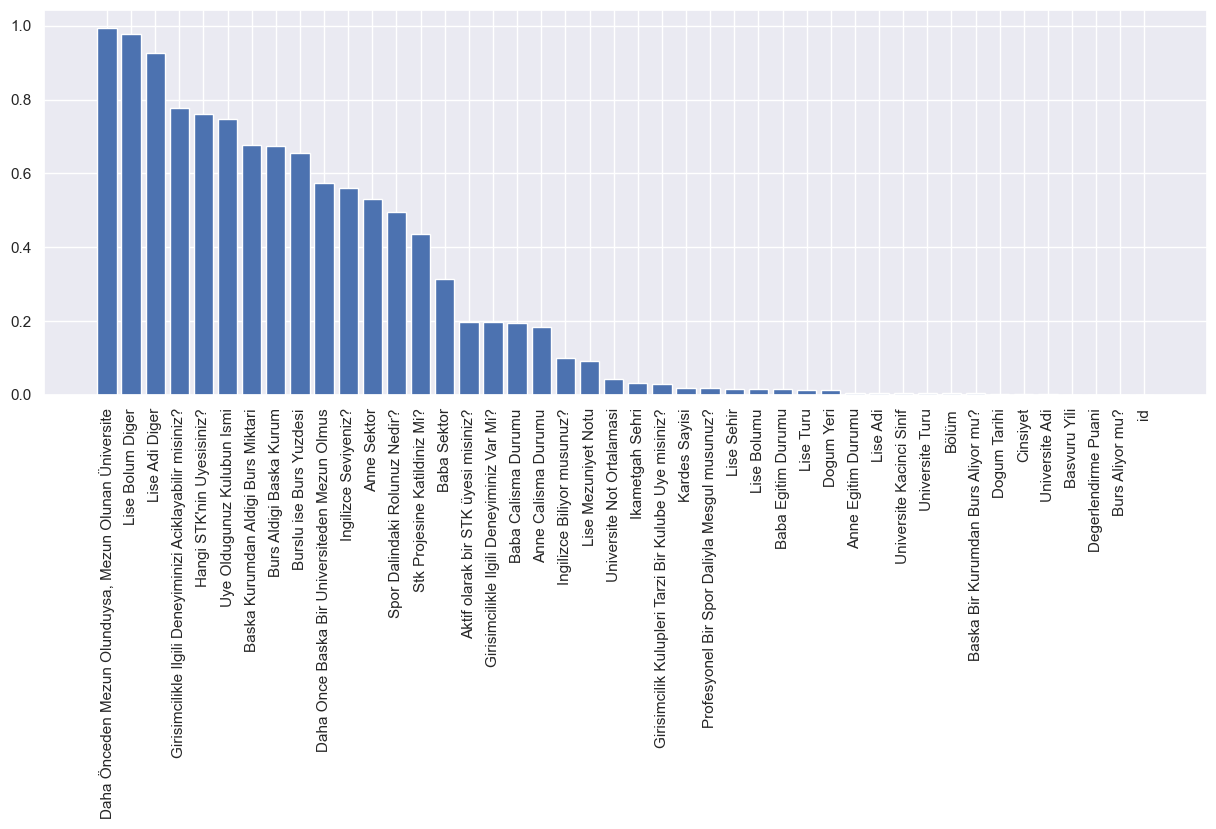

In [7]:
null_ratios = train_df.isnull().sum() / len(train_df)
null_ratios_over70=null_ratios[null_ratios>0.70]
null_ratios.sort_values(ascending=False, inplace=True)
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(null_ratios.keys(), null_ratios.values);

In [9]:
# Bazı kolonlar test setinde olmadığı için bazıları ise boş olduğu için kaldıralım
dropped_columns=["Burslu ise Burs Yuzdesi","Daha Once Baska Bir Universiteden Mezun Olmus","Lise Adi Diger","Lise Bolum Diger","Uye Oldugunuz Kulubun Ismi",
                 "Stk Projesine Katildiniz Mi?","Ingilizce Seviyeniz?","Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite"]
train_df_dropped=train_df.drop(dropped_columns,axis=1)

In [42]:
def find_categorical_columns(df):
    cat_columns=[]
    for col in df.columns:
        if df[col].dtypes=="O":
            cat_columns.append(col)
    return cat_columns
categorical_cols=find_categorical_columns(train_df_dropped)
categorical_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Lise Adi',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'Ingilizce Biliyor musunuz?']

<Axes: xlabel='Cinsiyet'>

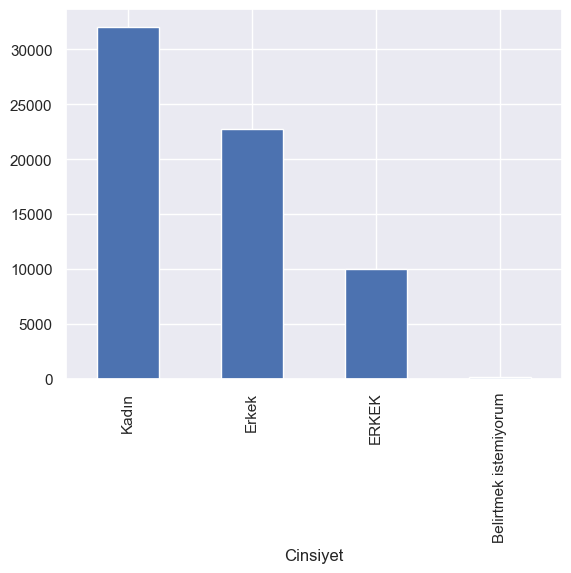

In [10]:
train_df["Cinsiyet"].value_counts().plot.bar()
## iki farklı erkek kategorisi var?

<Axes: xlabel='Universite Turu'>

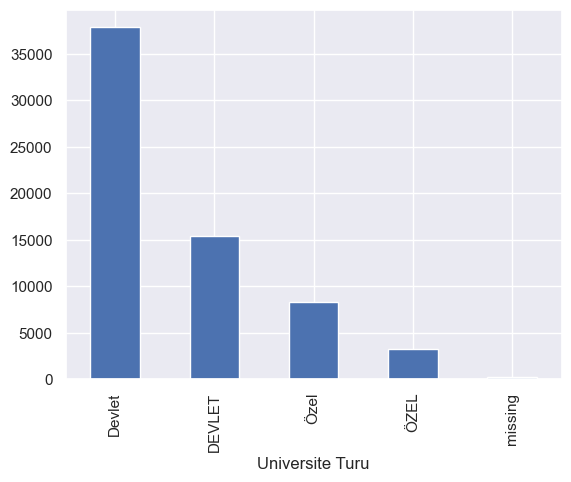

In [11]:
train_df["Universite Turu"].fillna("missing").value_counts().plot.bar()

<Axes: xlabel='Burs Aliyor mu?'>

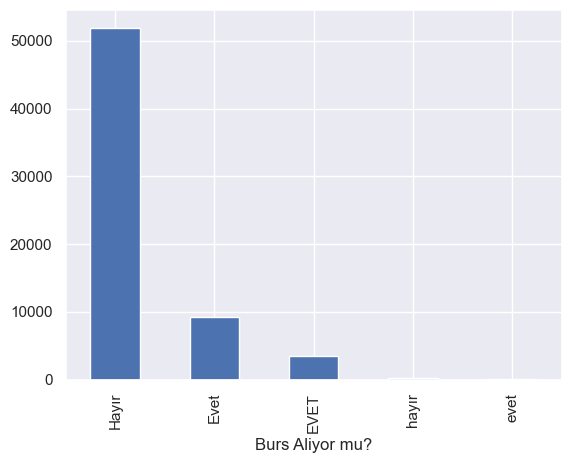

In [12]:
train_df["Burs Aliyor mu?"].value_counts().plot.bar()

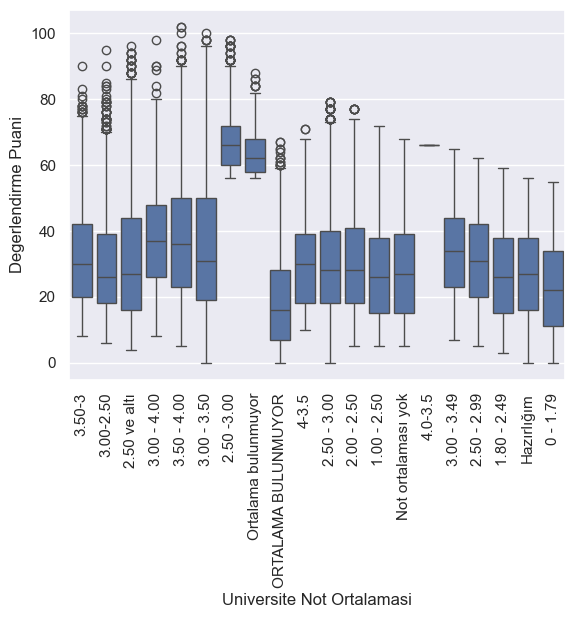

In [13]:
ax=sns.boxplot(data=train_df,x="Universite Not Ortalamasi",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

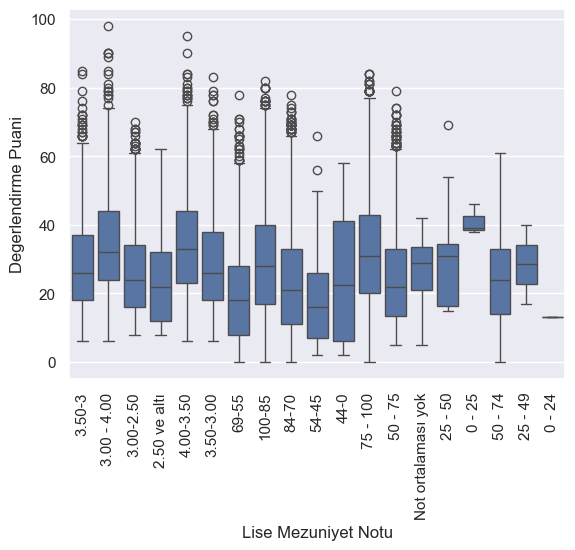

In [14]:
ax=sns.boxplot(data=train_df,x="Lise Mezuniyet Notu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

In [15]:
train_df["Universite Kacinci Sinif"].value_counts()

Universite Kacinci Sinif
2                21773
3                16956
4                13112
1                10260
Hazırlık          1275
5                  961
Mezun              178
6                  177
hazırlık            33
Yüksek Lisans       15
Tez                  7
0                    3
Name: count, dtype: int64

In [16]:
train_df["Baska Bir Kurumdan Burs Aliyor mu?"].value_counts()

Baska Bir Kurumdan Burs Aliyor mu?
Hayır    48513
Evet     16380
Name: count, dtype: int64

<Axes: xlabel='Anne Calisma Durumu'>

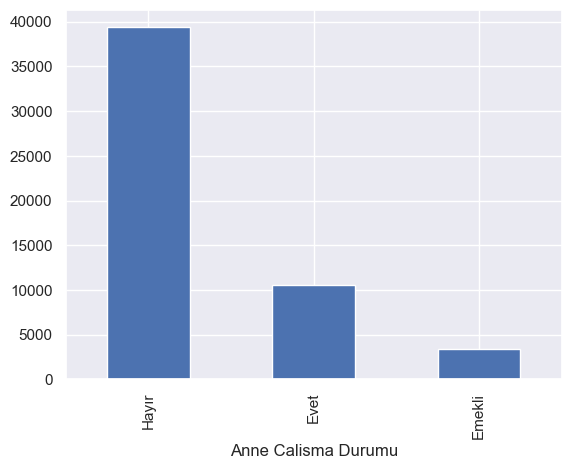

In [17]:
train_df["Anne Calisma Durumu"].value_counts().plot.bar()

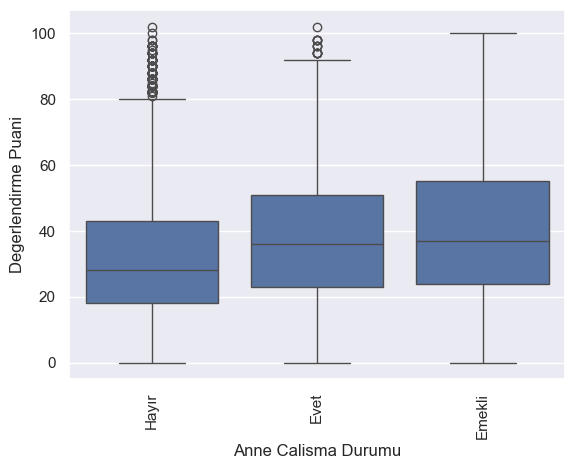

In [18]:
ax=sns.boxplot(data=train_df,x="Anne Calisma Durumu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

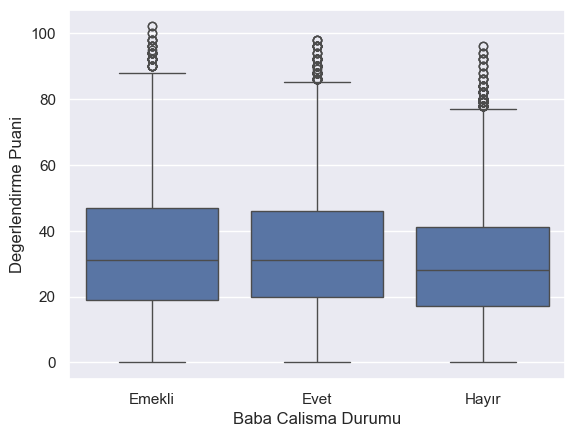

In [19]:
ax=sns.boxplot(data=train_df,x="Baba Calisma Durumu",y="Degerlendirme Puani",linewidth=1)

In [20]:
train_df["Kardes Sayisi"].value_counts()
# Kardeş sayısının "." dan öncekileri alıp integer veri tipine dönüştür

Kardes Sayisi
1.0                                             16186
2.0                                             13061
3.0                                              6734
1                                                6054
4.0                                              4611
2                                                3938
0.0                                              3701
5.0                                              3421
3                                                2087
0                                                1381
4                                                 998
5                                                 715
6.0                                               206
7.0                                               159
6                                                 135
10.0                                              127
7                                                 119
8.0                                                98
9.0           

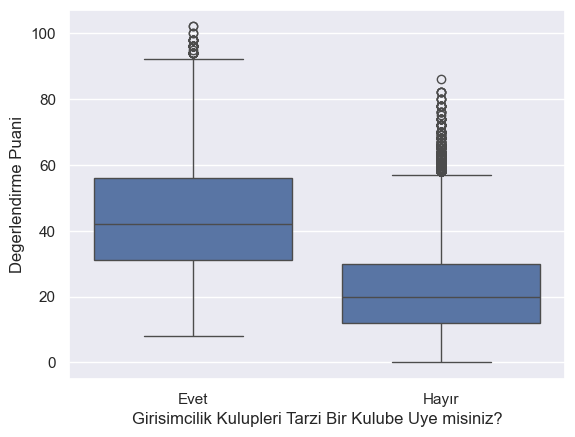

In [21]:
ax=sns.boxplot(data=train_df,x="Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

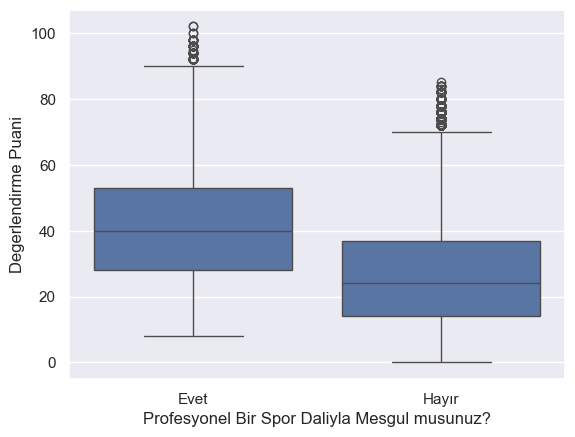

In [22]:
ax=sns.boxplot(data=train_df,x="Profesyonel Bir Spor Daliyla Mesgul musunuz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

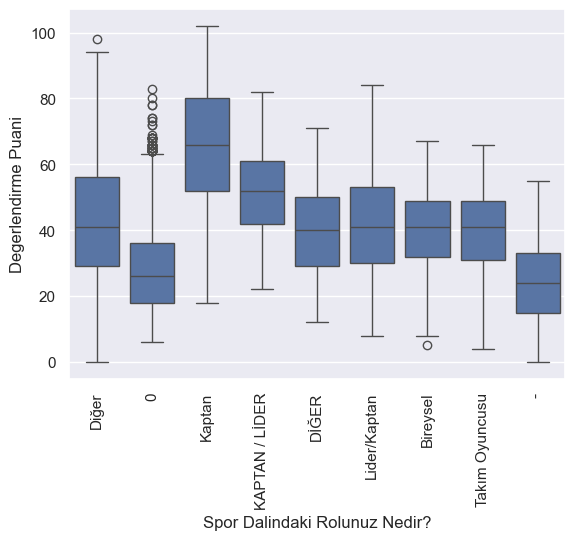

In [23]:
ax=sns.boxplot(data=train_df,x="Spor Dalindaki Rolunuz Nedir?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

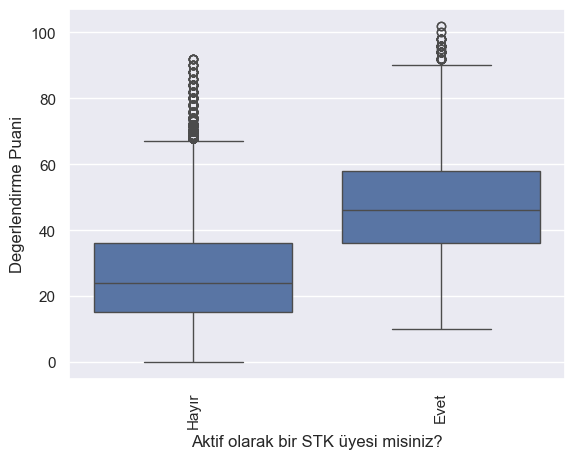

In [24]:
ax=sns.boxplot(data=train_df,x="Aktif olarak bir STK üyesi misiniz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

Object `Mi` not found.


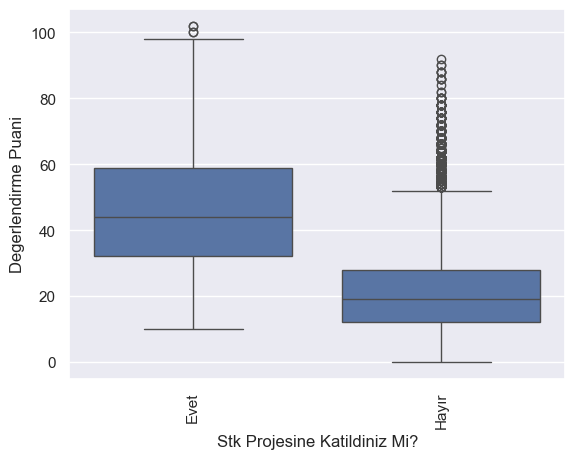

In [25]:
Stk Projesine Katildiniz Mi?
ax=sns.boxplot(data=train_df,x="Stk Projesine Katildiniz Mi?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

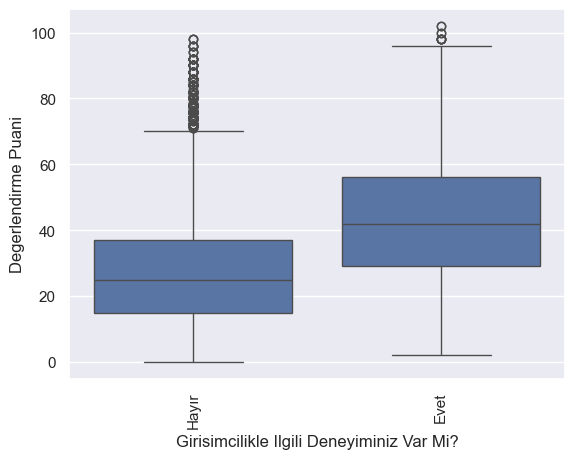

In [26]:
ax=sns.boxplot(data=train_df,x="Girisimcilikle Ilgili Deneyiminiz Var Mi?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

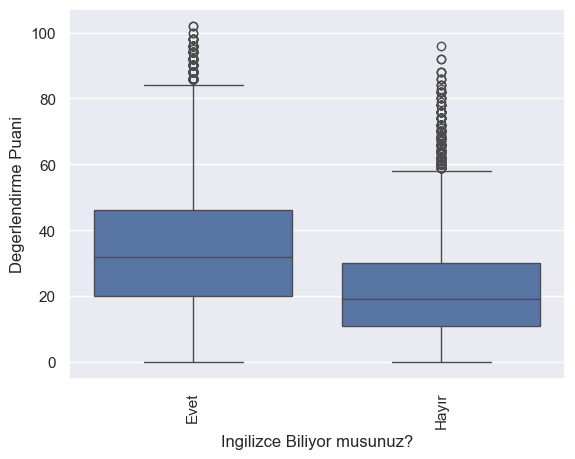

In [27]:
ax=sns.boxplot(data=train_df,x="Ingilizce Biliyor musunuz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

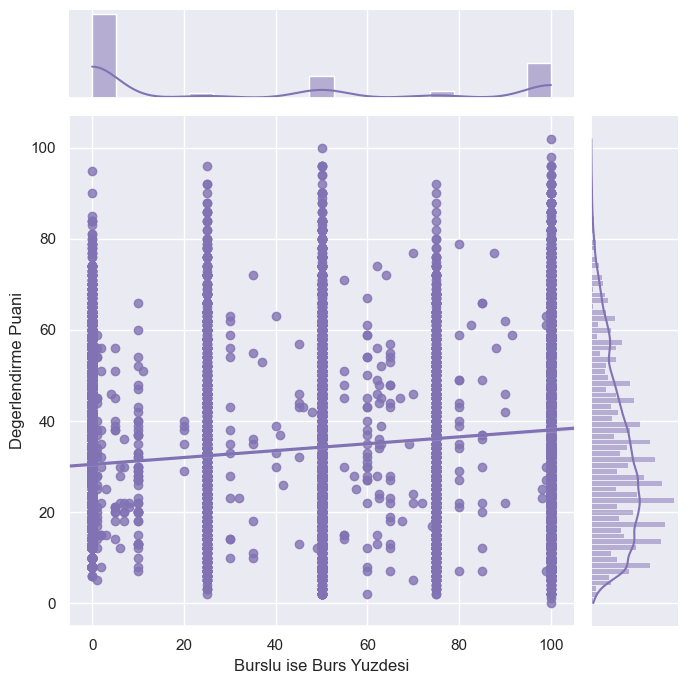

In [28]:
g = sns.jointplot(x="Burslu ise Burs Yuzdesi", y="Degerlendirme Puani", data=train_df,
                  kind="reg", truncate=False,                  
                  color="m", height=7)

In [43]:
box_plot_columns=["Universite Not Ortalamasi","Burs Aliyor mu?","Lise Mezuniyet Notu","Anne Calisma Durumu","Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?","Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                 "Ingilizce Biliyor musunuz?"]


In [30]:
train_df["Universite Adi"].value_counts()

Universite Adi
İSTANBUL ÜNİVERSİTESİ                      2083
MARMARA ÜNİVERSİTESİ                       1672
İSTANBUL TEKNİK ÜNİVERSİTESİ               1464
YILDIZ TEKNİK ÜNİVERSİTESİ                 1438
ORTA DOĞU TEKNİK ÜNİVERSİTESİ              1258
                                           ... 
Brown University                              1
ALANYA HAMDULLAH EMİN PAŞA ÜNİVERSİTESİ       1
İstanbul Bilim Üniversitesi                   1
AVRUPA MESLEK YÜKSEKOKULU                     1
İstanbul Atlas Üniversitesi                   1
Name: count, Length: 527, dtype: int64

In [31]:

train_df["Baska Kurumdan Aldigi Burs Miktari"].value_counts()

Baska Kurumdan Aldigi Burs Miktari
-                                           4724
500 ve üzeri                                4513
500₺ - 999₺                                 2447
500                                         1966
425                                         1344
                                            ... 
Aylık 300 tl                                   1
200-280                                        1
Nakit burs değil. Yurt ücretim ödeniyor.       1
340 tl                                         1
1 ay basina 300?                               1
Name: count, Length: 587, dtype: int64

#### String Değerleri Düzenle

In [32]:
low_columns = ['Cinsiyet', 'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 
           'Universite Turu', 'Burs Aliyor mu?', 'Bölüm', 'Lise Adi', 'Lise Adi Diger',
           'Lise Sehir', 'Lise Turu', 'Burs Aldigi Baska Kurum', 'Anne Egitim Durumu',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor',
           'Uye Oldugunuz Kulubun Ismi', 'Spor Dalindaki Rolunuz Nedir?']

In [33]:
# Lowecase yapan method
def make_lowercase(list_of_low, df):
    for label in list_of_low:
        df[label] = df[label].str.lower()

In [34]:
make_lowercase(low_columns, train_df)

#### University Note translate


In [36]:
# Fill the empty note data
train_df_dropped['Universite Not Ortalamasi'] = train_df_dropped['Universite Not Ortalamasi'].fillna('missing')

In [37]:
# Universite Notunu duzgun formata uyarlayiniz.
Univertiy_map = {'Ortalama bulunmuyor': 'missing',
                 'ORTALAMA BULUNMUYOR': 'missing',
                 'Not ortalaması yok': 'missing',
                 'Hazırlığım': 'Hazırlığım',
                 '3.50-3': '3.00 - 3.49',
                 '3.00-2.50': '2.50 - 2.99',
                 '2.50 ve altı': '1.80 - 2.49',
                 '3.00 - 4.00': '3.00 - 3.49',
                 '3.50 - 4.00': '3.50 - 4.00',
                 '3.00 - 3.50': '3.00 - 3.49',
                 '2.50 -3.00': '2.50 - 2.99',
                 '4-3.5': '3.50 - 4.00',
                 '2.50 - 3.00': '2.50 - 2.99',
                 '2.00 - 2.50': '1.80 - 2.49',
                 '1.00 - 2.50': '1.80 - 2.49',
                 '4.0-3.5': '3.50 - 4.00',
                 '3.00 - 3.49': '3.00 - 3.49',
                 '2.50 - 2.99': '2.50 - 2.99',
                 '1.80 - 2.49': '1.80 - 2.49',
                 '0 - 1.79': '0 - 1.79',
                 'missing': 'missing'
                }
train_df_dropped['Universite Not Ortalamasi'] = train_df_dropped['Universite Not Ortalamasi'].map(Univertiy_map)

In [38]:
pd.unique(train_df_dropped['Universite Not Ortalamasi'])

array(['3.00 - 3.49', '2.50 - 2.99', 'missing', '1.80 - 2.49',
       '3.50 - 4.00', 'Hazırlığım', '0 - 1.79'], dtype=object)

In [ ]:
train_df_dropped['Universite Not Ortalamasi'].isna().sum()

#### Tek bir satırda grafikleri çizelim

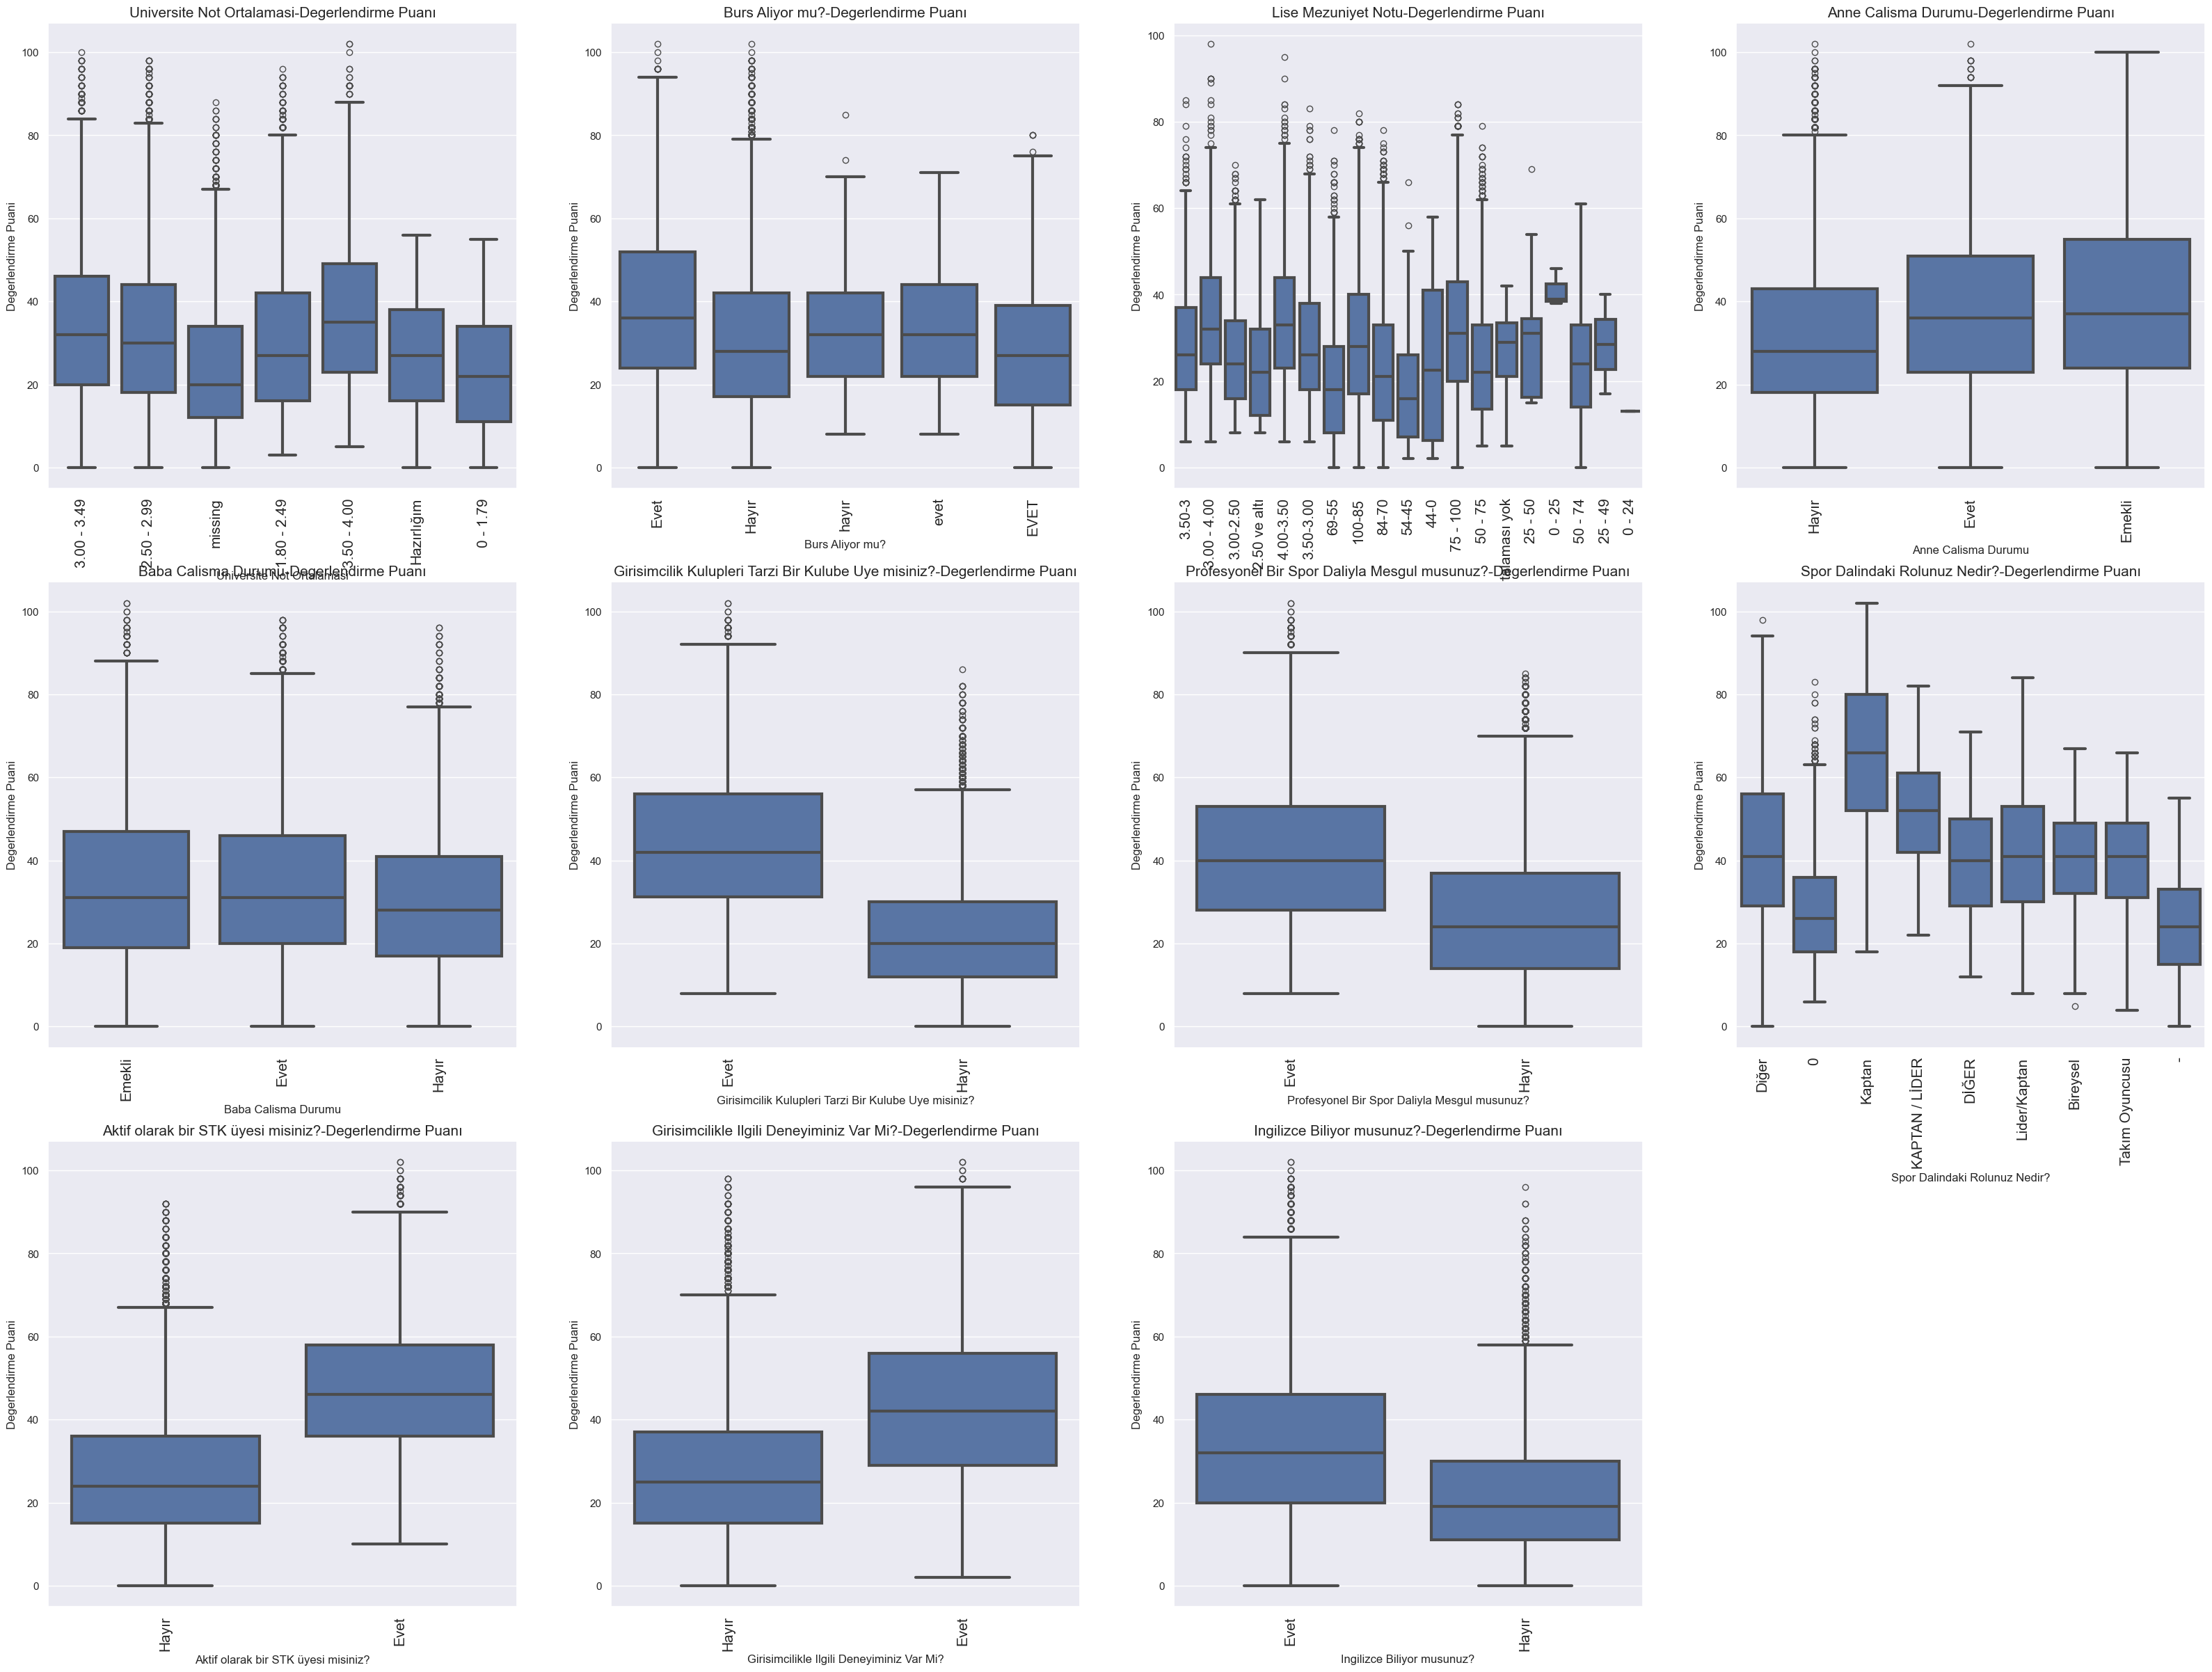

In [44]:
plt.figure(figsize=(40,40))
k=1
for i in box_plot_columns:
    ax=plt.subplot(4,4,k)
    k+=1
    ax=sns.boxplot(data=train_df_dropped,x=i,y="Degerlendirme Puani",linewidth=3)
    plt.title(f"{i}-Degerlendirme Puanı",fontsize=15)
    plt.xticks(rotation=90,fontsize=15);

#### Bazı Outliersleri Kaldıralım

In [ ]:
"""
def detect_outliers(df,columns):
    for column in columns:
        for var in df[column].unique():
            print(var)
            if type(var)!=float:
                selected_var=df["Degerlendirme Puani"][df[column]==var]
                q1 = np.percentile(selected_var,25) # 1.çeyrek = %25
                q3 = np.percentile(selected_var,75) # 3.çeyrek = %75
                IQR = q3-q1
                maximum=q3+(1.5*IQR)
                print(column,var, "max=",maximum)

Missing Valueler doldurulduktan sonra uygulanacak
 """   